___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall
from sklearn.svm import SVC
from sklearn.metrics import plot_precision_recall_curve , average_precision_score
from sklearn.metrics import make_scorer

from scipy.stats import skew
import scipy.stats as stats
from scipy.stats import chi2_contingency

import pickle

from xgboost import XGBClassifier
from sklearn.utils import class_weight

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

C:\Users\ertad\.conda\envs\bootcamp\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
import sklearn
import xgboost
print(f"sklearn version: {sklearn.__version__}")
print(f"xgboost version: {xgboost.__version__}")

sklearn version: 1.1.3
xgboost version: 1.5.0


## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
df_male = pd.read_csv("https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr", encoding = "ISO-8859-1")
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [4]:
df_female = pd.read_csv("https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq", encoding = "ISO-8859-1")
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [5]:
df_male.columns == df_female.columns

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [6]:
print(df_female.columns[0], df_male.columns[0])

SubjectId subjectid


In [7]:
df_male.rename(columns = {'subjectid':'SubjectId'}, inplace = True)

In [8]:
df_male.columns == df_female.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [9]:
print(df_male.shape, df_female.shape)

(4082, 108) (1986, 108)


In [10]:
df = df_male.append(df_female)

In [11]:
df.reset_index(drop = True, inplace = True)

In [12]:
df.shape

(6068, 108)

## Explore Data

In [13]:
pd.concat([df.head(), df.sample(5), df.tail()]).T

,0,1,2,3,4,3472,153,3796,4847,4611,6063,6064,6065,6066,6067
SubjectId,10027,10032,10033,10092,10093,28125,10855,28881,18332,17760,29501,29502,29503,29511,920103
abdominalextensiondepthsitting,266,233,287,234,250,243,265,254,216,249,285,262,260,205,238
acromialheight,1467,1395,1430,1347,1585,1625,1406,1369,1333,1380,1392,1324,1334,1293,1346
acromionradialelength,337,326,341,310,372,374,332,305,308,331,335,301,318,302,308
anklecircumference,222,220,230,230,247,262,238,235,206,215,223,202,213,199,210
axillaheight,1347,1293,1327,1239,1478,1518,1283,1234,1255,1294,1297,1204,1259,1207,1256
balloffootcircumference,253,245,256,262,267,289,258,255,243,238,252,236,234,213,236
balloffootlength,202,193,196,199,224,242,186,185,191,185,196,181,183,163,188
biacromialbreadth,401,394,427,401,435,452,416,412,357,387,368,378,363,376,361
bicepscircumferenceflexed,369,338,408,359,356,402,400,396,336,325,299,294,332,276,285


In [14]:
df["SubjectNumericRace"].value_counts(dropna=False)

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [15]:
df["DODRace"].value_counts(dropna=False)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [16]:
df.drop(columns = ["SubjectNumericRace"], inplace = True)

In [17]:
df.drop(index = df[df["DODRace"]>3].index, inplace = True)

In [18]:
df.reset_index(drop = True, inplace = True)

In [19]:
df["DODRace"].value_counts(dropna=False)

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
df.isnull().sum().sum()

4644

In [22]:
df.isnull().sum()

SubjectId                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [23]:
df.drop(columns = ["Ethnicity"], inplace = True)

In [24]:
df.shape

(5769, 106)

In [25]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 106 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    SubjectId                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [26]:
df.drop(columns = ["Date", "Weightlbs", "Heightin", "SubjectId"], inplace = True)

In [27]:
df_object = df.select_dtypes("object")

In [28]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

Gender                        : ['Male' 'Female']
Installation                  : ['Fort Hood' 'Fort Bliss' 'Camp Atterbury' 'Fort Drum' 'Fort McCoy'
 'Fort Stewart' 'Fort Rucker' 'Fort Bragg' 'Fort Gordon' 'Fort Huachuca'
 'Camp Shelby' 'Fort Lee']
Component                     : ['Regular Army' 'Army National Guard' 'Army Reserve']
Branch                        : ['Combat Arms' 'Combat Support' 'Combat Service Support']
PrimaryMOS                    : ['19D' '68W' '88M' '92G' '91L' '91D' '92F' '25L' '91B' '25B' '42A' '15T'
 '15G' '15N' '15B' '92W' '14S' '14J' '94M' '94T' '25F' '25U' '25C' '15F'
 '92A' '92Y' '14E' '35F' '89B' '11C' '91M' '13F' '19K' '15U' '13B' '21B'
 '91A' '35G' '15W' '915A' '25N' '25Q' '94F' '25W' '250N' '25A' '35M'
 '351L' '351M' '25S' '31B' '31E' '12B' '12N' '21E' '12A' '68E' '74D' '68H'
 '68A' '68J' '92S' '68K' '70K' '88N' '91C' '70B' '91P' '13D' '13R' '27D'
 '11B' '79S' '91J' '91W' '91H' '11Z' '11A' '13A' '31A' '56A' '35D' '00Z'
 '35L' '43B' '27A' '14T' '35P' '3

In [29]:
df["DODRace"] = df["DODRace"].astype("string")

In [30]:
df["DODRace"].replace({"1": "White", "2": "Black", "3": "Hispanic"}, inplace = True)
df["DODRace"].value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: Int64

In [31]:
df["Installation"].value_counts()

Camp Shelby       1111
Fort Bliss         925
Fort Gordon        636
Camp Atterbury     432
Fort McCoy         432
Fort Hood          416
Fort Huachuca      404
Fort Bragg         373
Fort Drum          369
Fort Lee           356
Fort Stewart       314
Fort Rucker          1
Name: Installation, dtype: int64

In [32]:
pd.crosstab(df["DODRace"], df["Installation"], normalize = 'index')

Installation,Camp Atterbury,Camp Shelby,Fort Bliss,Fort Bragg,Fort Drum,Fort Gordon,Fort Hood,Fort Huachuca,Fort Lee,Fort McCoy,Fort Rucker,Fort Stewart
DODRace,,,,,,,,,,,,
Black,0.059322,0.183359,0.136364,0.069337,0.050077,0.159476,0.060092,0.039291,0.125578,0.020801,0.000000,0.096302
Hispanic,0.025037,0.142857,0.182622,0.097202,0.081001,0.113402,0.079529,0.057437,0.061856,0.089838,0.000000,0.069219
White,0.089135,0.204641,0.164557,0.057226,0.065665,0.092827,0.074895,0.082806,0.039821,0.090717,0.000264,0.037447


In [33]:
contigency = pd.crosstab(df["DODRace"], df["Installation"])

In [34]:
c, p, dof, expected = chi2_contingency(contigency)

In [35]:
p

5.390758395036572e-70

In [36]:
df.groupby("DODRace")["Component"].value_counts(normalize = True)

DODRace   Component          
Black     Regular Army           0.575501
          Army National Guard    0.384438
          Army Reserve           0.040062
Hispanic  Regular Army           0.567010
          Army National Guard    0.372607
          Army Reserve           0.060383
White     Army National Guard    0.489188
          Regular Army           0.480749
          Army Reserve           0.030063
Name: Component, dtype: float64

In [37]:
df["PrimaryMOS"].value_counts()

11B     641
88M     308
92A     275
91B     224
68W     207
92Y     200
25U     193
42A     189
31B     187
25B     169
12B     154
13B     129
35D     121
19D     119
74D     118
92G     116
35M     114
92F     114
25Q     110
35F      81
91D      67
25S      63
25L      61
19K      50
11C      50
25N      47
25A      44
12N      38
91C      38
13D      37
11A      36
13F      36
94F      33
35G      33
92W      31
90A      30
91J      29
94E      29
91A      28
36B      26
89B      24
91H      24
21B      24
91L      22
35T      19
88N      19
68A      19
92S      18
25W      18
68E      17
27D      17
11Z      17
12C      17
92M      17
12W      17
15T      16
56M      16
35N      15
91X      15
13A      15
31E      14
13R      14
14J      14
25P      14
68J      14
35L      13
68K      13
88Z      13
15W      13
70B      12
91E      12
35P      12
15P      12
35X      11
13Z      11
31A      11
66H      11
88A      11
25C      11
351L     11
12R      10
14Z      10
14E      10
12Y 

In [38]:
df.drop(columns = ["PrimaryMOS"], inplace = True)

In [39]:
df.drop(columns =["Installation"], inplace = True)

In [40]:
df["SubjectsBirthLocation"].value_counts()

California                417
New York                  411
Texas                     386
Indiana                   264
Florida                   210
Illinois                  210
Oklahoma                  205
Minnesota                 194
Michigan                  194
Mississippi               193
Georgia                   168
Alabama                   164
South Carolina            161
North Carolina            145
Ohio                      139
Louisiana                 136
Pennsylvania              130
Virginia                  113
Massachusetts             109
Wisconsin                  99
Germany                    90
New Jersey                 88
Puerto Rico                88
Missouri                   83
Colorado                   78
Maryland                   78
Arizona                    75
Tennessee                  74
Kentucky                   67
Kansas                     62
Washington                 61
Iowa                       55
South Dakota               53
Arkansas  

In [41]:
df.shape

(5769, 100)

In [42]:
region = pd.read_csv("classification.csv")
df = pd.merge(left_on = "SubjectsBirthLocation", right_on = "Country", left = df, right = region, how = "left")
df.drop(columns = ["SubjectsBirthLocation", "Country"], inplace = True)
df.head().T

,0,1,2,3,4
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356
bicristalbreadth,274,257,261,262,263


In [43]:
df[df.Region.isnull()]

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Component,Branch,DODRace,Age,WritingPreference,Region


In [44]:
X = df.drop(columns = ["DODRace"])
y = df["DODRace"]

In [45]:
y.value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: Int64

In [46]:
df.shape

(5769, 100)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8, stratify = y)

In [48]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4615, 99) (1154, 99) (4615,) (1154,)


In [49]:
display(y_train.value_counts(normalize = True), y_test.value_counts(normalize = True))

White       0.657421
Black       0.224919
Hispanic     0.11766
Name: DODRace, dtype: Float64

White       0.656846
Black       0.225303
Hispanic    0.117851
Name: DODRace, dtype: Float64

In [50]:
X_train.select_dtypes("object").columns.to_list()

['Gender', 'Component', 'Branch', 'WritingPreference', 'Region']

In [51]:
cat_onehot = X_train.select_dtypes("object").columns.to_list()

In [52]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), remainder=StandardScaler())

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [53]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("logistic", LogisticRegression())]

logistic_pipe = Pipeline(steps=operations)

logistic_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference',
                                                   'Region'])])),
                ('logistic', LogisticRegression())])

In [54]:
y_pred = logistic_pipe.predict(X_test)
y_pred

array(['Hispanic', 'White', 'White', ..., 'Black', 'White', 'White'],
      dtype=object)

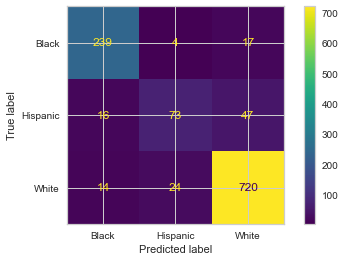

In [55]:
plot_confusion_matrix(logistic_pipe, X_test, y_test)

In [56]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [57]:
eval_metric(logistic_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[239   4  17]
 [ 16  73  47]
 [ 14  24 720]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.72      0.54      0.62       136
       White       0.92      0.95      0.93       758

    accuracy                           0.89      1154
   macro avg       0.84      0.80      0.82      1154
weighted avg       0.89      0.89      0.89      1154


Train_Set
[[ 964   18   56]
 [  28  310  205]
 [  33   82 2919]]
              precision    recall  f1-score   support

       Black       0.94      0.93      0.93      1038
    Hispanic       0.76      0.57      0.65       543
       White       0.92      0.96      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.87      0.82      0.84      4615
weighted avg       0.90      0.91      0.90      4615



### Cross Validate

In [58]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), remainder=StandardScaler())
operations = [("OneHot_Ordinal_Encoder", column_trans), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)
cv = 10
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, cv+1))
df_scores.mean()[2:]

# multiclass datalarda CV veya gridsearchCV için precision, recall ve f1 metriclerini tek başına kullanmayız. Yukarda olduğu
# gibi precision_weighted, precision_macro, precision_micro vb. yazmalıyız. Yoksa hata alırsınız. Spesifik olarak tek bir 
# sınıfa ait CV scorlarını görmek istiyorsak aşağıda gösterildiği gibi make_scorer fonksiyonunu kullanmalıyız.

test_accuracy               0.888189
train_accuracy              0.907764
test_precision_weighted     0.882318
train_precision_weighted    0.903136
test_recall_weighted        0.888189
train_recall_weighted       0.907764
test_f1_weighted            0.883081
train_f1_weighted           0.903648
dtype: float64

### Logistic Model GridsearchCV

In [59]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), remainder=StandardScaler())
operations = [("OneHot_Ordinal_Encoder", column_trans), ("logistic", LogisticRegression(class_weight='balanced',max_iter=100000, random_state = 101))]
model = Pipeline(steps=operations)

recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

penalty = ["l1", "l2", 'none', 'elasticnet']
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]
solver = ['liblinear', 'lbfgs']

param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C,
             "logistic__solver": solver}
log_grid_model = GridSearchCV(model, param_grid = param_grid, scoring = recall_Hispanic, cv=10, n_jobs = -1, return_train_score=True)
log_grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'WritingPreference',
                                                                          'Region'])])),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=100000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25],
                         'logistic__penalty': ['l1', 'l2', 'none',
                                               'elasticnet'],
                         'logistic__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [60]:
log_grid_model.best_params_

{'logistic__C': 0.1, 'logistic__penalty': 'l2', 'logistic__solver': 'lbfgs'}

In [61]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), remainder=StandardScaler())
operations = [("OneHot_Ordinal_Encoder", column_trans), ("logistic", LogisticRegression(class_weight='balanced',max_iter=100000, random_state = 101))]
model = Pipeline(steps=operations)

recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

penalty = ["l1", "l2", 'none', 'elasticnet']
C = [0.01, 0.05, 0.07, 0.1, 0.25, 0.5, 1]
solver = ['liblinear', 'lbfgs']

param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C,
             "logistic__solver": solver}
log_grid_model = GridSearchCV(model, param_grid = param_grid, scoring = recall_Hispanic, cv=10, n_jobs = -1, return_train_score=True)
log_grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'WritingPreference',
                                                                          'Region'])])),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=100000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.05, 0.07, 0.1, 0.25, 0.5, 1],
                         'logistic__penalty': ['l1', 'l2', 'none',
                                               'elasticnet'],
                         'logistic__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [62]:
log_grid_model.best_params_

{'logistic__C': 0.05, 'logistic__penalty': 'l2', 'logistic__solver': 'lbfgs'}

In [63]:
log_grid_model.best_score_

0.7771717171717173

In [64]:
y_pred = log_grid_model.predict(X_test)
y_pred

array(['Hispanic', 'Hispanic', 'White', ..., 'Black', 'White', 'White'],
      dtype=object)

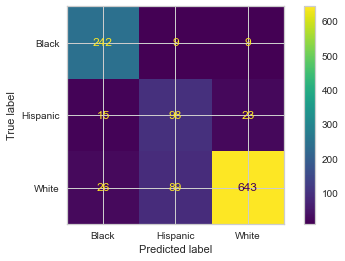

In [65]:
plot_confusion_matrix(log_grid_model, X_test, y_test)

In [66]:
eval_metric(log_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[242   9   9]
 [ 15  98  23]
 [ 26  89 643]]
              precision    recall  f1-score   support

       Black       0.86      0.93      0.89       260
    Hispanic       0.50      0.72      0.59       136
       White       0.95      0.85      0.90       758

    accuracy                           0.85      1154
   macro avg       0.77      0.83      0.79      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 958   49   31]
 [  26  443   74]
 [  74  384 2576]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91      1038
    Hispanic       0.51      0.82      0.62       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.86      0.81      4615
weighted avg       0.89      0.86      0.87      4615



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

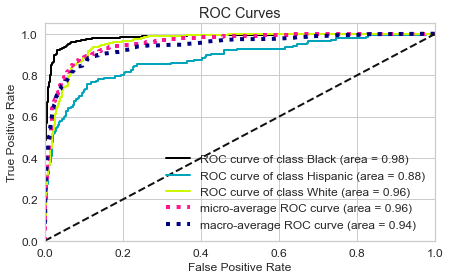

In [67]:
y_pred_proba = log_grid_model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

In [68]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_test_dummies = pd.get_dummies(y_test).values

roc_auc_score(y_test_dummies[:, 0], y_pred_proba[:, 0])

0.9837549475133368

## Precision Recall Curve

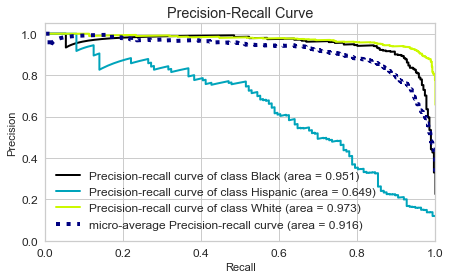

In [69]:
y_pred_proba = log_grid_model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

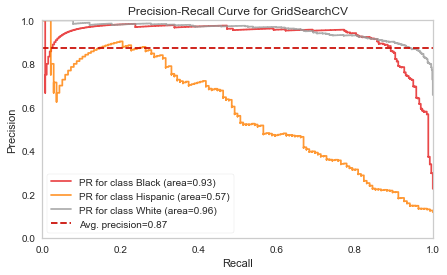

In [70]:
viz = PrecisionRecallCurve(
    log_grid_model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [71]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.6485433338038471

In [72]:
y_pred = log_grid_model.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## Final Model and Model Deployment

In [73]:
pickle.dump(log_grid_model, open("final_logistic_pipe_model2", 'wb'))

In [74]:
final_logistic_pipe_model = pickle.load(open("final_logistic_pipe_model2", "rb"))

In [75]:
y_pred=final_logistic_pipe_model.predict(X_test)
y_pred_proba = final_logistic_pipe_model.predict_proba(X_test)
y_pred_proba

array([[2.06170124e-02, 8.72541040e-01, 1.06841948e-01],
       [5.04294881e-02, 5.13067494e-01, 4.36503017e-01],
       [2.72721417e-02, 3.58617969e-01, 6.14109889e-01],
       ...,
       [9.99174477e-01, 4.13146321e-04, 4.12376762e-04],
       [1.15546477e-03, 9.27736076e-03, 9.89567174e-01],
       [2.14829400e-03, 1.21854333e-01, 8.75997373e-01]])

In [76]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_Black"] = y_pred_proba[:,0]
test_data["pred_proba_Hispanic"] = y_pred_proba[:,1]
test_data["pred_proba_White"] = y_pred_proba[:,2]
test_data.sample(10)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Component,Branch,Age,WritingPreference,Region,DODRace,pred,pred_proba_Black,pred_proba_Hispanic,pred_proba_White
1036,236,1385,328,223,1283,249,203,394,330,281,474,74,338,299,138,937,211,851,587,476,364,1466,275,971,237,1235,838,517,294,35,70,26,215,773,102,277,354,279,547,475,1073,85,212,187,156,596,213,361,73,329,358,1030,680,402,438,469,545,483,75,396,130,357,391,1364,114,429,263,1116,346,153,880,875,572,1769,1699,1390,1061,564,169,792,461,133,868,1540,462,305,866,215,398,1007,708,168,805,Male,Regular Army,Combat Arms,22,Right hand,West,Hispanic,Hispanic,0.033402,0.908987,0.057611
5247,217,1276,308,210,1178,233,182,383,301,269,453,66,311,283,127,1032,222,791,563,448,404,1327,257,852,217,1114,747,594,312,38,63,20,216,715,93,245,327,264,504,454,1004,83,191,185,137,553,180,299,63,372,404,949,605,334,375,438,500,463,58,433,119,318,362,1262,114,376,243,1008,334,132,815,800,547,1703,1553,1254,1011,625,164,723,437,122,809,1466,395,282,831,208,329,938,624,156,738,Female,Regular Army,Combat Service Support,32,Left hand,South,Black,Black,0.903507,0.073702,0.022790
5661,247,1265,283,222,1157,227,167,350,333,260,449,64,310,307,131,1032,240,756,534,435,391,1308,262,943,256,1083,709,672,357,34,51,19,257,725,95,234,282,270,532,404,944,76,177,171,147,560,186,298,62,360,399,928,580,397,405,417,478,438,59,416,107,343,380,1180,103,349,215,990,307,126,832,753,485,1504,1530,1248,987,638,180,641,401,110,772,1564,397,307,872,223,344,913,687,151,788,Female,Army National Guard,Combat Service Support,29,Right hand,South,White,White,0.104037,0.155179,0.740783
4732,299,1353,308,252,1258,250,184,376,371,297,480,71,317,297,139,1130,274,838,615,501,445,1423,282,1029,273,1192,795,700,366,30,57,19,253,770,98,250,322,313,563,442,1088,83,202,183,144,563,191,330,68,382,427,1013,590,392,400,470,526,493,72,437,115,339,383,1301,106,397,254,1078,328,133,879,822,541,1698,1658,1360,1072,693,187,808,452,127,847,1656,435,353,1047,275,367,1004,852,177,826,Female,Regular Army,Combat Service Support,26,Right hand,West,White,White,0.029605,0.098851,0.871544
971,257,1506,338,240,1397,259,208,420,351,289,513,79,341,323,151,1062,279,908,640,514,415,1590,299,1108,270,1348,880,720,430,38,62,24,266,854,102,282,370,311,585,497,1170,93,217,192,165,622,215,355,82,363,387,1108,635,397,423,519,588,521,81,424,130,397,433,1503,120,449,283,1181,372,144,979,9

## 2. SVC

### Vanilla SVC model 

In [77]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), remainder=StandardScaler())
operations = [("OneHot_Ordinal_Encoder", column_trans), ("svc_vanilla", SVC())]
svc_vanilla_pipe = Pipeline(steps=operations)
svc_vanilla_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference',
                                                   'Region'])])),
                ('svc_vanilla', SVC())])

In [78]:
y_pred = svc_vanilla_pipe.predict(X_test)
y_pred
eval_metric(svc_vanilla_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[236   4  20]
 [ 18  56  62]
 [ 14   8 736]]
              precision    recall  f1-score   support

       Black       0.88      0.91      0.89       260
    Hispanic       0.82      0.41      0.55       136
       White       0.90      0.97      0.93       758

    accuracy                           0.89      1154
   macro avg       0.87      0.76      0.79      1154
weighted avg       0.89      0.89      0.88      1154


Train_Set
[[ 965    9   64]
 [  31  240  272]
 [  10   20 3004]]
              precision    recall  f1-score   support

       Black       0.96      0.93      0.94      1038
    Hispanic       0.89      0.44      0.59       543
       White       0.90      0.99      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.92      0.79      0.83      4615
weighted avg       0.91      0.91      0.90      4615



###  SVC Model GridsearchCV

In [79]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), remainder=StandardScaler())
operations = [("OneHot_Ordinal_Encoder", column_trans), ("SVC", SVC(class_weight="balanced",random_state=101))]
svc_pipe = Pipeline(steps=operations)
param_grid = {'SVC__C':[0.01, 0.1, 1, 10],
              'SVC__kernel':['linear','rbf','sigmoid','poly'],
              'SVC__gamma':["scale", "auto"],
              'SVC__degree':[2,3],
              'SVC__class_weight': [None, 'balanced']}
svc_grid_model = GridSearchCV(svc_pipe, param_grid = param_grid, scoring=recall_Hispanic, cv=5, return_train_score=True, n_jobs=-1)
svc_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'WritingPreference',
                                                                          'Region'])])),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.01, 0.1, 1, 10],
                         'SVC__class_weight': [None, 'balanced'],
                         'SVC__degree': [2, 3], 'SVC__gamma': ['scale', 'auto'],
                         'SVC__kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [80]:
svc_grid_model.best_params_

{'SVC__C': 0.01,
 'SVC__class_weight': 'balanced',
 'SVC__degree': 2,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'linear'}

In [81]:
svc_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference',
                                                   'Region'])])),
                ('SVC',
                 SVC(C=0.01, class_weight='balanced', degree=2, kernel='linear',
                     random_state=101))])

In [82]:
pd.DataFrame(svc_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SVC__C,param_SVC__class_weight,param_SVC__degree,param_SVC__gamma,param_SVC__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.818100,0.079026,0.115701,0.005462,0.01,None,2,scale,linear,"{'SVC__C': 0.01, 'SVC__class_weight': None, 'S...",0.407407,0.370370,0.348624,0.431193,0.311927,0.373904,0.042184,65,0.390805,0.411494,0.421659,0.387097,0.403226,0.402856,0.012821
1,1.903999,0.179323,0.554701,0.053320,0.01,None,2,scale,rbf,"{'SVC__C': 0.01, 'SVC__class_weight': None, 'S...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.999602,0.167278,0.238998,0.037657,0.01,None,2,scale,sigmoid,"{'SVC__C': 0.01, 'SVC__class_weight': None, 'S...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.681093,0.139052,0.200898,0.008345,0.01,None,2,scale,poly,"{'SVC__C': 0.01, 'SVC__class_weight': None, 'S...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.809599,0.137180,0.128000,0.017319,0.01,None,2,auto,linear,"{'SVC__C': 0.01, 'SVC__class_weight': None, 'S...",0.407407,0.370370,0.348624,0.431193,0.311927,0.373904,0.042184,65,0.390805,0.411494,0.421659,0.387097,0.403226,0.402856,0.012821
5,1.540101,0.147157,0.540699,0.041770,0.01,None,2,auto,rbf,"{'SVC__C': 0.01, 'SVC__class_weight': None, 'S...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1.703198,0.204711,0.230600,0.017811,0.01,None,2,auto,sigmoid,"{'SVC__C': 0.01, 'SVC__class_weight': None, 'S...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,1.408898,0.101756,0.204300,0.008998,0.01,None,2,auto,poly,"{'SVC__C': 0.01, 'SVC__class_weight': None, 'S...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.626897,0.050629,0.123900,0.012174,0.01,None,3,scale,linear,"{'SVC__C': 0.01, 'SVC__class_weight': None, 'S...",0.407407,0.370370,0.348624,0.431193,0.311927,0.373904,0.042184,65,0.390805,0.411494,0.421659,0.387097,0.403226,0.402856,0.012821
9,1.528402,0.153831,0.574599,0.062087,0.01,None,3,scale,rbf,"{'SVC__C': 0.01, 'SVC__class_weight': None, 'S...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [83]:
svc_grid_model.best_index_

16

In [84]:
pd.DataFrame(svc_grid_model.cv_results_).loc[svc_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.773513
mean_train_score    0.808017
Name: 16, dtype: object

In [85]:
svc_grid_model.best_score_

0.7735134216785593

In [86]:
eval_metric(svc_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[243   9   8]
 [ 13 101  22]
 [ 21  87 650]]
              precision    recall  f1-score   support

       Black       0.88      0.93      0.91       260
    Hispanic       0.51      0.74      0.61       136
       White       0.96      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.84      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 949   52   37]
 [  28  439   76]
 [  56  384 2594]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92      1038
    Hispanic       0.50      0.81      0.62       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.86      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [87]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), remainder=StandardScaler())
operations = [("OneHot_Ordinal_Encoder", column_trans), ("SVC", SVC(C = 0.01, kernel = 'linear', class_weight = "balanced", random_state = 101))]
model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring = recall_Hispanic, cv = 10,
                       return_train_score=True, n_jobs = -1)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score     0.768013
train_score    0.807653
dtype: float64

In [88]:
decision_function = svc_grid_model.decision_function(X_test)
decision_function

array([[-0.25295124,  2.25305617,  0.99820291],
       [-0.23037647,  1.18731716,  2.16280852],
       [-0.2480949 ,  1.18123952,  2.21073785],
       ...,
       [ 2.2863394 ,  0.74761404, -0.24948037],
       [-0.27107617,  0.84972378,  2.27935276],
       [-0.27225625,  1.13187327,  2.26393222]])

In [89]:
svc_grid_model.predict(X_test)

array(['Hispanic', 'White', 'White', ..., 'Black', 'White', 'White'],
      dtype=object)

In [90]:
svc_grid_model.best_params_

{'SVC__C': 0.01,
 'SVC__class_weight': 'balanced',
 'SVC__degree': 2,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'linear'}

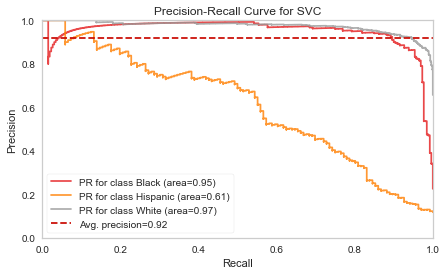

In [91]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(C = 0.01, kernel = 'linear', class_weight = "balanced", random_state = 101))]

model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

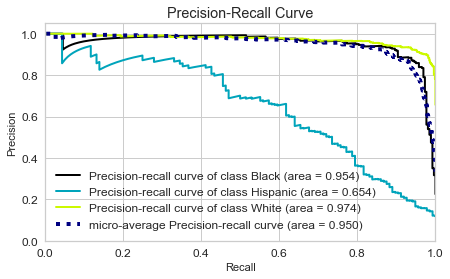

In [92]:
operations = [("OneHotEncoder", column_trans), ("svc", SVC(C = 0.01, kernel = 'linear', class_weight = "balanced", random_state = 101, probability=True))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

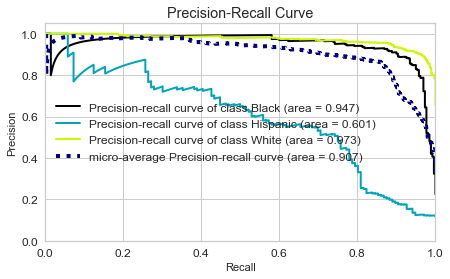

In [93]:
operations = [("OneHotEncoder", column_trans), ("svc", SVC(C = 0.01, kernel = 'linear', class_weight = "balanced", random_state = 101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

#y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, decision_function)
plt.show();

In [94]:
y_pred = svc_grid_model.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## Final Model and Model Deployment

In [95]:
pickle.dump(svc_grid_model, open("final_svc_pipe_model2", 'wb'))

## 3. RF

### Vanilla RF Model

In [96]:
from sklearn.ensemble import RandomForestClassifier

cat_ordinal = X_train.select_dtypes("object").columns.to_list()

column_trans = make_column_transformer((OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_ordinal), remainder="passthrough")
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference',
                                                   'Region'])])),
                ('RF_model', RandomForestClassifier(random_state=101))])

In [97]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[200   0  60]
 [ 15  25  96]
 [ 14   5 739]]
              precision    recall  f1-score   support

       Black       0.87      0.77      0.82       260
    Hispanic       0.83      0.18      0.30       136
       White       0.83      0.97      0.89       758

    accuracy                           0.84      1154
   macro avg       0.84      0.64      0.67      1154
weighted avg       0.84      0.84      0.81      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [98]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = recall_Hispanic, 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score     0.1233
train_score    1.0000
dtype: float64

In [99]:
pipe_model["RF_model"].feature_importances_

array([0.00397921, 0.00145817, 0.00287608, 0.00080809, 0.03293168,
       0.00554214, 0.0084697 , 0.00636971, 0.00890991, 0.00633869,
       0.00598522, 0.00747539, 0.00748103, 0.00801148, 0.03223503,
       0.00557258, 0.00568286, 0.02160734, 0.00828171, 0.0088802 ,
       0.00588187, 0.00717623, 0.01065926, 0.0158539 , 0.01561577,
       0.00593605, 0.00886551, 0.01036328, 0.0072991 , 0.00583173,
       0.00685363, 0.00787708, 0.00685055, 0.00655181, 0.00511546,
       0.01087377, 0.00880225, 0.02876969, 0.04341575, 0.00587035,
       0.00661139, 0.0141283 , 0.00709285, 0.00661138, 0.02259273,
       0.0062614 , 0.00562011, 0.00619417, 0.01659824, 0.00598498,
       0.01380063, 0.00753049, 0.00658581, 0.03567248, 0.0077604 ,
       0.00620765, 0.00660175, 0.03215702, 0.00590937, 0.0054667 ,
       0.00660846, 0.00657547, 0.0066722 , 0.01469519, 0.00696612,
       0.00689274, 0.00662941, 0.00638996, 0.00620401, 0.01407437,
       0.00581219, 0.01561211, 0.00641777, 0.00730846, 0.00520

In [100]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['ordinalencoder__Gender', 'ordinalencoder__Component',
       'ordinalencoder__Branch', 'ordinalencoder__WritingPreference',
       'ordinalencoder__Region',
       'remainder__abdominalextensiondepthsitting',
       'remainder__acromialheight', 'remainder__acromionradialelength',
       'remainder__anklecircumference', 'remainder__axillaheight',
       'remainder__balloffootcircumference',
       'remainder__balloffootlength', 'remainder__biacromialbreadth',
       'remainder__bicepscircumferenceflexed',
       'remainder__bicristalbreadth', 'remainder__bideltoidbreadth',
       'remainder__bimalleolarbreadth', 'remainder__bitragionchinarc',
       'remainder__bitragionsubmandibulararc',
       'remainder__bizygomaticbreadth', 'remainder__buttockcircumference',
       'remainder__buttockdepth', 'remainder__buttockheight',
       'remainder__buttockkneelength',
       'remainder__buttockpopliteallength',
       'remainder__calfcircumference', 'remainder__cervicaleheight',
      

In [101]:
new_features = [i.replace("ordinalencoder__","").replace("remainder__", "") for i in features]
new_features

['Gender',
 'Component',
 'Branch',
 'WritingPreference',
 'Region',
 'abdominalextensiondepthsitting',
 'acromialheight',
 'acromionradialelength',
 'anklecircumference',
 'axillaheight',
 'balloffootcircumference',
 'balloffootlength',
 'biacromialbreadth',
 'bicepscircumferenceflexed',
 'bicristalbreadth',
 'bideltoidbreadth',
 'bimalleolarbreadth',
 'bitragionchinarc',
 'bitragionsubmandibulararc',
 'bizygomaticbreadth',
 'buttockcircumference',
 'buttockdepth',
 'buttockheight',
 'buttockkneelength',
 'buttockpopliteallength',
 'calfcircumference',
 'cervicaleheight',
 'chestbreadth',
 'chestcircumference',
 'chestdepth',
 'chestheight',
 'crotchheight',
 'crotchlengthomphalion',
 'crotchlengthposterioromphalion',
 'earbreadth',
 'earlength',
 'earprotrusion',
 'elbowrestheight',
 'eyeheightsitting',
 'footbreadthhorizontal',
 'footlength',
 'forearmcenterofgriplength',
 'forearmcircumferenceflexed',
 'forearmforearmbreadth',
 'forearmhandlength',
 'functionalleglength',
 'handbre

In [102]:
rf_feature_imp = pd.DataFrame(data = pipe_model["RF_model"].feature_importances_, index = new_features, #index=X.columns
                              columns = ["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
eyeheightsitting,0.043416
sittingheight,0.042166
heelbreadth,0.035672
Region,0.032932
bicristalbreadth,0.032235
interpupillarybreadth,0.032157
elbowrestheight,0.028770
forearmhandlength,0.022593
bitragionchinarc,0.021607
wristheight,0.017208


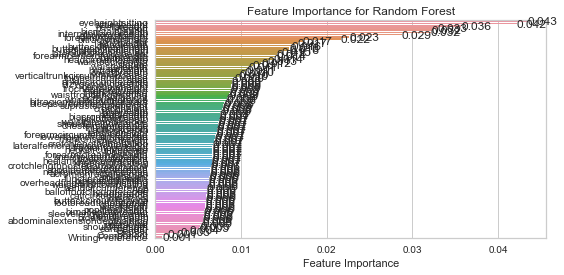

In [103]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

### RF Model GridsearchCV

In [104]:
column_trans = make_column_transformer((OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_ordinal), remainder="passthrough")
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

pipe_model = Pipeline(steps=operations)

param_grid = {'RF_model__n_estimators':[128, 200, 400, 500],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             #'RF_model__min_samples_split':[2, 3, 4],
             #'RF_model__min_samples_leaf': [2, 3, 4],
             'RF_model__max_samples':[0.8, 1]} # add 1

rf_grid_model = GridSearchCV(pipe_model, param_grid, scoring = recall_Hispanic, cv = 5, return_train_score = True, n_jobs = -1, verbose=3).fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [105]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2,
 'RF_model__max_features': 'sqrt',
 'RF_model__max_samples': 0.8,
 'RF_model__n_estimators': 128}

In [106]:
rf_grid_model.best_index_

16

In [107]:
pd.DataFrame(rf_grid_model.cv_results_).loc[16, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.661247
mean_train_score     0.69245
Name: 16, dtype: object

In [108]:
rf_grid_model.best_score_

0.661247026843357

In [109]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[198  38  24]
 [ 18  88  30]
 [ 80 212 466]]
              precision    recall  f1-score   support

       Black       0.67      0.76      0.71       260
    Hispanic       0.26      0.65      0.37       136
       White       0.90      0.61      0.73       758

    accuracy                           0.65      1154
   macro avg       0.61      0.67      0.60      1154
weighted avg       0.77      0.65      0.68      1154


Train_Set
[[ 792  126  120]
 [  46  379  118]
 [ 333  857 1844]]
              precision    recall  f1-score   support

       Black       0.68      0.76      0.72      1038
    Hispanic       0.28      0.70      0.40       543
       White       0.89      0.61      0.72      3034

    accuracy                           0.65      4615
   macro avg       0.61      0.69      0.61      4615
weighted avg       0.77      0.65      0.68      4615



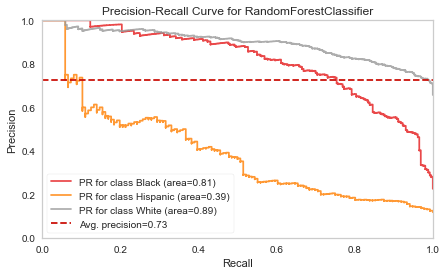

In [110]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                    max_depth=2, max_features = 'sqrt', n_estimators=128, max_samples = 0.8, random_state=101))]

model = Pipeline(steps=operations_rf)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [111]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [112]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

pipe_model_xgb.fit(X_train, y_train)

[10:11:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference',
                                                   'Region'])])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_b...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=24, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=101, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [113]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.50703142, 0.50703142, 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [114]:
comp = pd.DataFrame(classes_weights, columns=["weights"], index = y_train.index)

comp["label"] = y_train
comp.head()

,weights,label
3857,0.507031,White
4588,0.507031,White
4041,0.507031,White
4458,0.507031,White
1238,0.507031,White


In [115]:
comp.groupby("label")["weights"].value_counts()

label     weights 
Black     1.482017    1038
Hispanic  2.833026     543
White     0.507031    3034
Name: weights, dtype: int64

In [116]:
pipe_model_xgb.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore, we need to assign the weight of each class to its instances, which is the same thing.

[10:11:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference',
                                                   'Region'])])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_b...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=24, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=101, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [117]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test)

Test_Set
[[232   6  22]
 [ 15  73  48]
 [ 20  26 712]]
              precision    recall  f1-score   support

       Black       0.87      0.89      0.88       260
    Hispanic       0.70      0.54      0.61       136
       White       0.91      0.94      0.92       758

    accuracy                           0.88      1154
   macro avg       0.82      0.79      0.80      1154
weighted avg       0.88      0.88      0.88      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [118]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, X_train, y_train, scoring = recall_Hispanic, cv = 5, return_train_score=True,
                        fit_params={"XGB_model__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

[10:11:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:40] WARNI

test_score     0.488022
train_score    1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [119]:
param_grid = {"XGB_model__n_estimators":[20, 30, 40],
              'XGB_model__max_depth':[1,2, 3],
              "XGB_model__learning_rate": [0.01, 0.03, 0.05, 0.1],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [120]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=recall_Hispanic,
                              cv=5,
                              n_jobs = -1,
                              return_train_score=True)

In [121]:
xgb_grid_model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

[10:12:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'WritingPreference',
                                                                          'Region'])])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      co...
                                                      tree_method=None,
                                                      validate_parameters=None,
                                                      verbosity=None))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.01, 0.03, 0.05, 0.1],
                         'XGB_model__max_depth': [1, 2, 3],
                         'XGB_model__n_estimators': [20, 30, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [122]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.01,
 'XGB_model__max_depth': 1,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 1}

In [123]:
xgb_grid_model.best_index_

5

In [124]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[5, ["mean_test_score", "mean_train_score"]]

mean_test_score      0.70717
mean_train_score    0.720529
Name: 5, dtype: object

In [125]:
xgb_grid_model.best_score_

0.7071695548759769

In [126]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[160  44  56]
 [ 18  94  24]
 [107 216 435]]
              precision    recall  f1-score   support

       Black       0.56      0.62      0.59       260
    Hispanic       0.27      0.69      0.38       136
       White       0.84      0.57      0.68       758

    accuracy                           0.60      1154
   macro avg       0.56      0.63      0.55      1154
weighted avg       0.71      0.60      0.63      1154


Train_Set
[[ 619  174  245]
 [  55  396   92]
 [ 454  817 1763]]
              precision    recall  f1-score   support

       Black       0.55      0.60      0.57      1038
    Hispanic       0.29      0.73      0.41       543
       White       0.84      0.58      0.69      3034

    accuracy                           0.60      4615
   macro avg       0.56      0.64      0.56      4615
weighted avg       0.71      0.60      0.63      4615



[10:12:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


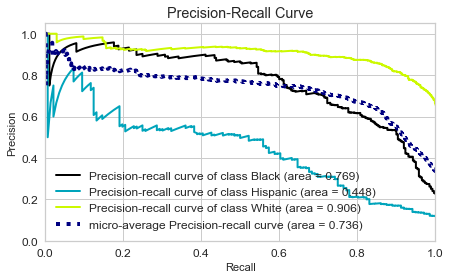

In [127]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(colsample_bytree=0.8, learning_rate=0.05, 
                                            max_depth=2, n_estimators=20, objective='multi:softprob', random_state=101,
                                            subsample=0.8))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [128]:
y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.4476253018453572

In [129]:
y_test_dummies

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [130]:
y_pred_proba

array([[0.22710341, 0.51523626, 0.2576604 ],
       [0.22933282, 0.28496504, 0.48570213],
       [0.38090205, 0.2615103 , 0.35758767],
       ...,
       [0.39678872, 0.25556362, 0.34764764],
       [0.25836387, 0.21916884, 0.52246726],
       [0.21453817, 0.51001966, 0.2754421 ]], dtype=float32)

In [131]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

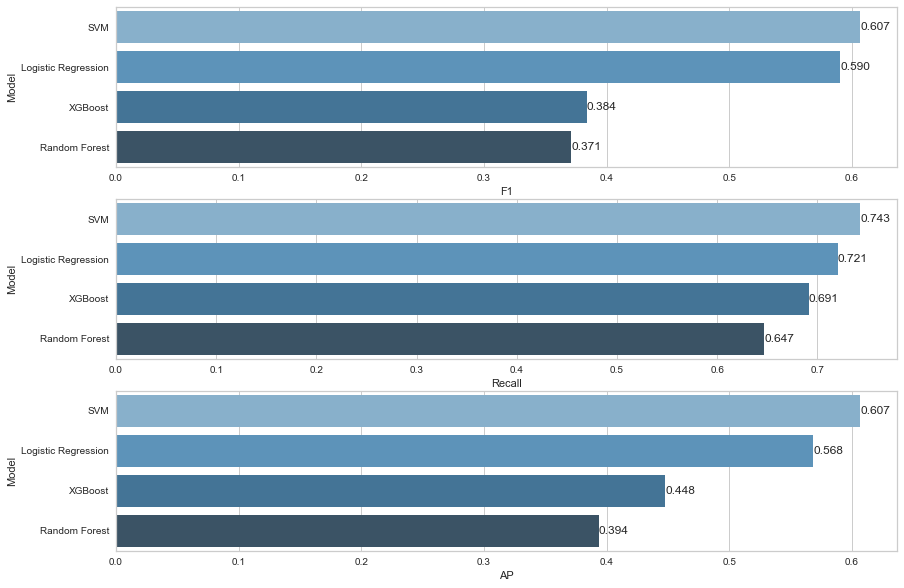

In [132]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

In [133]:
pickle.dump(svc_grid_model, open("final_svc_pipe_model2", 'wb'))

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [135]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [136]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), remainder=StandardScaler())
operations = [("OneHotEncoder",column_trans), ('o', over), ('u', under), 
              ("SVC", SVC(C = 0.01, kernel = 'linear', random_state = 101))]
smote_pipeline = imbpipeline(steps=operations)
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference',
                                                   'Region'])])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('SVC', SVC(C=0.01, kernel='linear', random_state=101))])

In [137]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[235   6  19]
 [ 14  80  42]
 [ 14  39 705]]
              precision    recall  f1-score   support

       Black       0.89      0.90      0.90       260
    Hispanic       0.64      0.59      0.61       136
       White       0.92      0.93      0.93       758

    accuracy                           0.88      1154
   macro avg       0.82      0.81      0.81      1154
weighted avg       0.88      0.88      0.88      1154


Train_Set
[[ 930   35   73]
 [  30  352  161]
 [  35  151 2848]]
              precision    recall  f1-score   support

       Black       0.93      0.90      0.91      1038
    Hispanic       0.65      0.65      0.65       543
       White       0.92      0.94      0.93      3034

    accuracy                           0.89      4615
   macro avg       0.84      0.83      0.83      4615
weighted avg       0.89      0.89      0.89      4615



In [139]:
scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.630263
train_precision_Hispanic    0.652036
test_recall_Hispanic        0.613333
train_recall_Hispanic       0.649276
test_f1_Hispanic            0.619924
train_f1_Hispanic           0.650495
dtype: float64

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [140]:
import shap

column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), remainder=StandardScaler())
X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = SVC(C = 0.01, kernel = 'linear', class_weight = "balanced", random_state = 101)
model_shap.fit(X_train_trans, y_train)

SVC(C=0.01, class_weight='balanced', kernel='linear', random_state=101)

In [141]:
features = column_trans_shap.get_feature_names_out()
new_features = [i.replace("onehotencoder__", "").replace("remainder__","") for i in features]

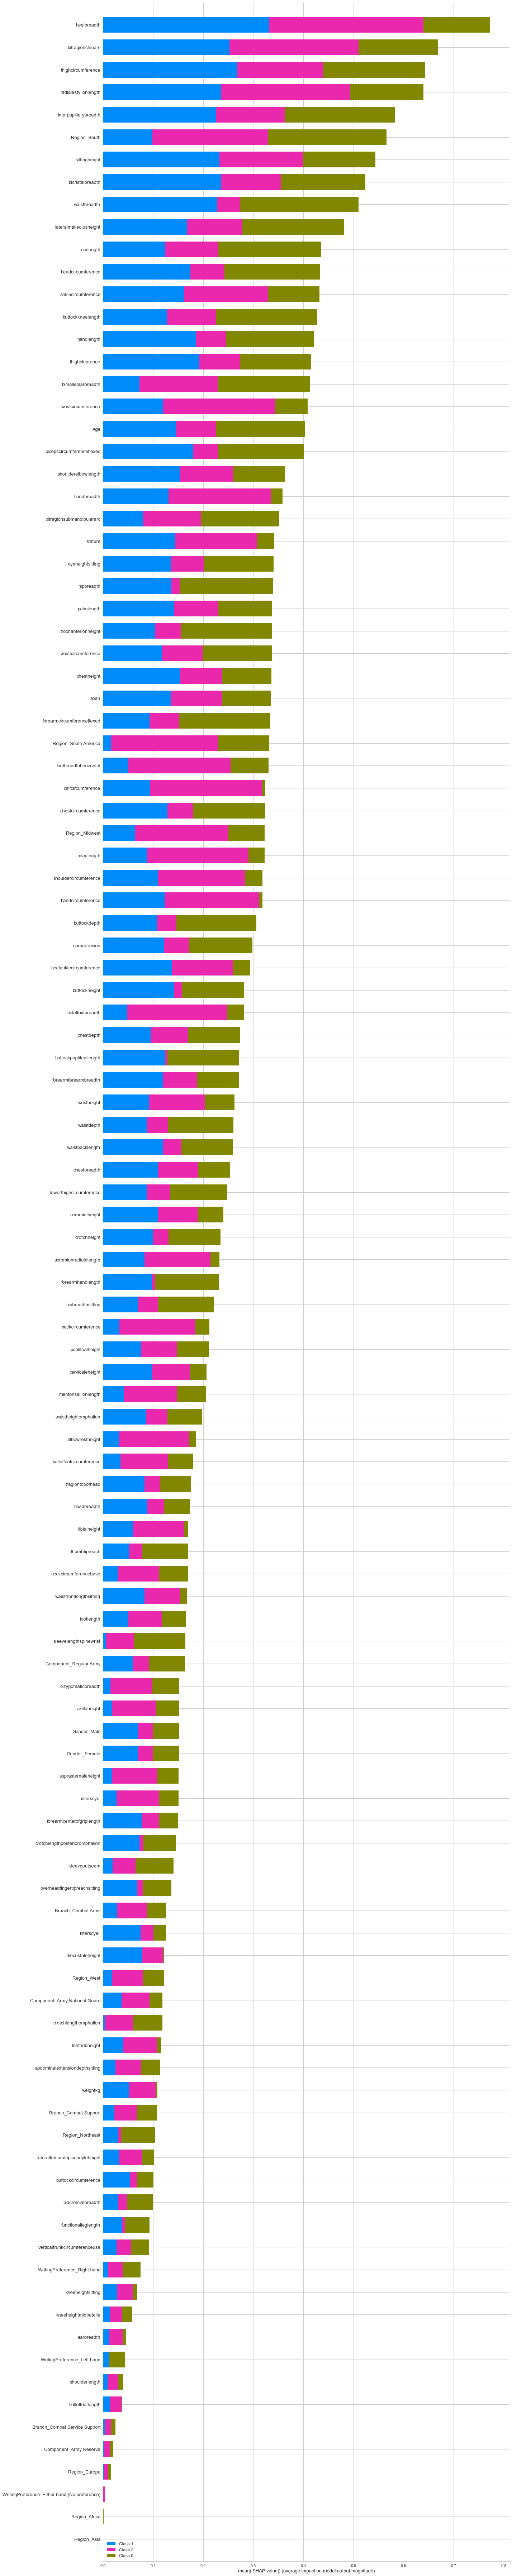

In [142]:
explainer = shap.LinearExplainer(model_shap, X_train_trans) #LinearExplainer

shap_values = explainer.shap_values(X_test_trans)

shap.summary_plot(shap_values,  max_display=300, feature_names = new_features, plot_size=(20,100))

In [145]:
hispanic=["heelbreadth", "bitragionchinarc", "thighcircumference", "radialestylionlength", "interpupillarybreadth", "Region", "Age"]

In [146]:
X2 = X[hispanic]
X2.head()

,heelbreadth,bitragionchinarc,thighcircumference,radialestylionlength,interpupillarybreadth,Region,Age
0,70,319,610,273,685,Midwest,41
1,72,344,572,254,620,Northeast,35
2,70,345,685,268,665,Northeast,42
3,68,328,604,249,640,Midwest,31
4,69,340,672,302,675,South,21


In [147]:
cat_new = X2.select_dtypes("object").columns
cat_new

Index(['Region'], dtype='object')

In [148]:
X2.shape

(5769, 7)

In [149]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [155]:
column_trans_shap2 = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_new), remainder=StandardScaler())

operations_shap2 = [("OneHotEncoder",column_trans_shap2),("SVC", SVC(C = 0.01, kernel = 'linear', class_weight = "balanced", random_state = 101))]

pipe_shap_model2 = Pipeline(steps=operations_shap2)
pipe_shap_model2.fit(X_train2, y_train2)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Region'], dtype='object'))])),
                ('SVC',
                 SVC(C=0.01, class_weight='balanced', kernel='linear',
                     random_state=101))])

In [156]:
eval_metric(pipe_shap_model2, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[149  66  45]
 [  8 110  18]
 [167 215 376]]
              precision    recall  f1-score   support

       Black       0.46      0.57      0.51       260
    Hispanic       0.28      0.81      0.42       136
       White       0.86      0.50      0.63       758

    accuracy                           0.55      1154
   macro avg       0.53      0.63      0.52      1154
weighted avg       0.70      0.55      0.58      1154


Train_Set
[[ 587  246  205]
 [  37  435   71]
 [ 639  871 1524]]
              precision    recall  f1-score   support

       Black       0.46      0.57      0.51      1038
    Hispanic       0.28      0.80      0.42       543
       White       0.85      0.50      0.63      3034

    accuracy                           0.55      4615
   macro avg       0.53      0.62      0.52      4615
weighted avg       0.69      0.55      0.58      4615



In [157]:
model = Pipeline(steps=operations_shap2)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.281940
train_precision_Hispanic    0.285567
test_recall_Hispanic        0.788141
train_recall_Hispanic       0.789597
test_f1_Hispanic            0.414671
train_f1_Hispanic           0.418798
dtype: float64

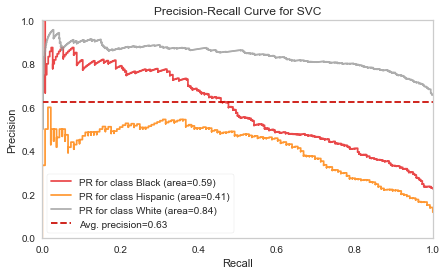

In [158]:
model = Pipeline(steps=operations_shap2)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

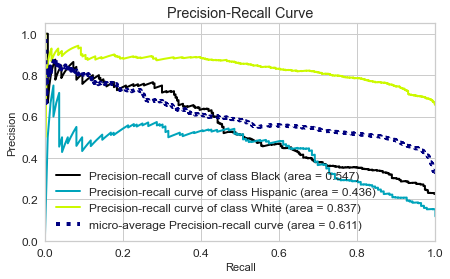

In [159]:
model = Pipeline(steps=operations_shap2)

model.fit(X_train2, y_train2)

decision_function = model.decision_function(X_test2)

#y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test2, decision_function)
plt.show();

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8, stratify = y)

In [161]:
cat_onehot = X_train.select_dtypes("object").columns.to_list()
olumn_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), remainder=StandardScaler())

In [162]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [163]:
operations = [("OneHotEncoder", column_trans), ("svc", SVC(C = 0.01, kernel = 'linear', class_weight = "balanced", random_state = 101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference',
                                                   'Region'])])),
                ('svc',
                 SVC(C=0.01, class_weight='balanced', kernel='linear',
                     random_state=101))])

In [164]:
X[X.Gender=="Male"].describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
count,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.00000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000
mean,255.449090,1442.946397,335.819441,229.590921,1331.098487,252.16594,201.229546,416.004360,358.579636,275.632213,510.927674,74.844063,331.655809,315.718389,142.434983,1021.294178,246.362401,889.500385,619.217235,504.001026,392.426520,1519.422160,289.786868,1060.496794,254.390100,1293.040267,847.637599,623.143114,356.354706,36.095153,64.171070,23.109772,244.823544,804.885099,101.893819,271.573993,349.573480,310.528084,580.702231,480.928956,1132.125673,88.379841,212.571172,193.509361,154.183637,574.708130,199.760708,344.002052,72.564504,346.256732,379.948448,1063.412670,639.948705,431.393947,450.628623,489.366504,555.224929,492.625545,73.061554,409.670685,122.684534,398.192101,435.159528,1428.469351,116.610156,430.684791,268.313927,1179.902539,364.305976,149.832265,918.678636,897.179277,594.007951,1816.628879,1758.385483,1440.699667,1122.444473,626.335214,180.739420,813.085407,469.222878,131.116697,902.586817,1666.783278,478.017953,327.110798,943.043344,238.560400,388.017440,1058.239805,858.714286,176.168761,848.762247,30.172352
std,37.295117,62.356906,17.281413,14.579399,58.714251,12.89351,10.329358,19.074837,34.511924,17.512428,32.450260,4.097052,13.970798,16.640502,6.141613,76.330564,26.4

In [165]:
male_mean_human = X[X.Gender=="Male"].describe(include="all").loc["mean"]
male_mean_human

abdominalextensiondepthsitting      255.44909
acromialheight                    1442.946397
acromionradialelength              335.819441
anklecircumference                 229.590921
axillaheight                      1331.098487
balloffootcircumference             252.16594
balloffootlength                   201.229546
biacromialbreadth                   416.00436
bicepscircumferenceflexed          358.579636
bicristalbreadth                   275.632213
bideltoidbreadth                   510.927674
bimalleolarbreadth                  74.844063
bitragionchinarc                   331.655809
bitragionsubmandibulararc          315.718389
bizygomaticbreadth                 142.434983
buttockcircumference              1021.294178
buttockdepth                       246.362401
buttockheight                      889.500385
buttockkneelength                  619.217235
buttockpopliteallength             504.001026
calfcircumference                   392.42652
cervicaleheight                   

In [168]:
male_mean_human["Gender"] = "Male"
male_mean_human["Region"] = "West"
male_mean_human["Component"] = "Regular Army"
male_mean_human["Branch"] = "Combat Support"
male_mean_human["WritingPreference"] = "Right hand"

In [169]:
pd.DataFrame(male_mean_human).T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Component,Branch,Age,WritingPreference,Region
mean,255.44909,1442.946397,335.819441,229.590921,1331.098487,252.16594,201.229546,416.00436,358.579636,275.632213,510.927674,74.844063,331.655809,315.718389,142.434983,1021.294178,246.362401,889.500385,619.217235,504.001026,392.42652,1519.42216,289.786868,1060.496794,254.3901,1293.040267,847.637599,623.143114,356.354706,36.095153,64.17107,23.109772,244.823544,804.885099,101.893819,271.573993,349.57348,310.528084,580.702231,480.928956,1132.125673,88.379841,212.571172,193.509361,154.183637,574.70813,199.760708,344.002052,72.564504,346.256732,379.948448,1063.41267,639.948705,431.393947,450.628623,489.366504,555.224929,492.625545,73.061554,409.670685,122.684534,398.192101,435.159528,1428.469351,116.610156,430.684791,268.313927,1179.902539,364.305976,149.832265,918.678636,897.179277,594.007951,1816.628879,1758.385483,1440.699667,1122.444473,626.335214,180.73942,813.085407,469.222878,131.116697,902.586817,1666.783278,478.017953,327.110798,943.043344,238.5604,388.01744,1058.239805,858.714286,176.168761,848.762247,Male,Regular Army,Combat Support,30.172352,Right hand,West


In [170]:
model.predict(pd.DataFrame(male_mean_human).T)

array(['White'], dtype=object)

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [171]:
from sklearn.metrics import matthews_corrcoef

y_pred = model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7491739497858351

In [172]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7426491085266995

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___